This project is to predict a click on advertisements is a fraud click. The dataset was provided by TalkingData, a China's largest independent big data service platform. The data described information about clicks and devices. The objective is to predict whether the user downloaded the app after clikcing the advertisements. So this is a binary classfication problem. The metric to evaluate the model is ROC-AUC, which require us to predict both classes accurately.     

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
pd.set_option('max_rows', 500)

In [3]:
train = pd.read_csv('/Users/mengruiyin/Dropbox/project3/train.csv')

In [4]:
test = pd.read_csv('/Users/mengruiyin/Dropbox/project3/test.csv')

In [74]:
train.shape, test.shape

((184903890, 11), (18790469, 10))

In [130]:
print 'the training set has ' + str(train.shape[0]) + (' data')
print 'the testing set has ' + str(test.shape[0]) + (' data')

the training set has 184903890 data
the testing set has 18790469 data


columns:
* ip: ip address of click
* app: app id for marketing
* device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
* os: os version id of user mobile phone
* channel: channel id of mobile ad publisher
* click_time: timestamp of click (UTC)
* attributed_time: if user download the app for after clicking an ad, this is the time of the app download
* is_attributed: the target that is to be predicted, indicating the app was downloaded

In [5]:
train.head(100)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


In [7]:
train.dtypes

ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object

In [4]:
na_check = pd.Series.to_frame(train.isnull().sum())
na_check.columns = ['missing']
na_check['percent'] = na_check['missing']/train.shape[0]
na_check

,missing,percent
ip,0,0.000000
app,0,0.000000
device,0,0.000000
os,0,0.000000
channel,0,0.000000
click_time,0,0.000000
attributed_time,184447044,0.997529
is_attributed,0,0.000000


only variable 'attributed_time' has 99.75% missing value. 

In [12]:
test.head(100)

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00
5,5,110769,18,1,13,107,2017-11-10 04:00:00
6,6,12540,3,1,1,137,2017-11-10 04:00:00
7,7,88637,27,1,19,153,2017-11-10 04:00:00
8,9,14932,18,1,10,107,2017-11-10 04:00:00
9,8,123701,12,1,53,424,2017-11-10 04:00:00


In [13]:
test.dtypes

click_id       int64
ip             int64
app            int64
device         int64
os             int64
channel        int64
click_time    object
dtype: object

In [102]:
na_check2 = pd.Series.to_frame(test.isnull().sum())
na_check2.columns = ['missing']
na_check2['percent'] = na_check2['missing']/test.shape[0]
na_check2

,missing,percent
click_id,0,0.0
ip,0,0.0
app,0,0.0
device,0,0.0
os,0,0.0
channel,0,0.0
click_time,0,0.0
day,0,0.0
weekday,0,0.0
hour,0,0.0


there is no missing value in the testing set

In [5]:
variables = ['ip', 'app', 'device', 'os', 'channel']
for item in variables:
    train[item] = train[item].astype('category')
    test[item]=test[item].astype('category')

change variables 'ip', 'app', 'device', 'os' and 'channel' to cateogry type. 

### EDA

In [11]:
def plot_top(df, col, color, title):
    top_ip_download = pd.DataFrame(df[col].value_counts()).head(10)
    top_ip_download.plot(kind = 'bar', color = color)
    plt.title(title, fontsize = 15)
    plt.show()
    return top_ip_download

###### ip

In [78]:
train['ip'].nunique()

277396

there are 277,396 unique values for ip addresses.

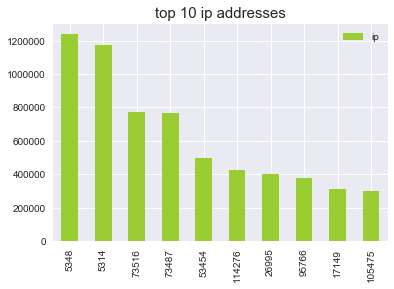

,ip
5348,1238734
5314,1171448
73516,770451
73487,763854
53454,498186
114276,427453
26995,401495
95766,378693
17149,310996
105475,302192


In [96]:
plot_top(train, 'ip', 'yellowgreen', 'top 10 ip addresses')

the plot shows top 10 ip addresses with the most click numbers. The ip address 5348 and 5314 have much more click numbers. We can focus on conversion rates of these two ip addresses. If no app downloaded for these two addresses, we may regard them as fraud clicks. 

##### app

In [14]:
train['app'].nunique()

706

there are 706 unique values for apps.

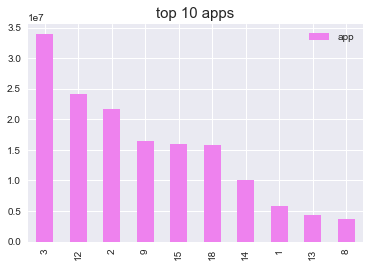

,app
3,33911780
12,24179003
2,21642136
9,16458268
15,15958970
18,15756587
14,10027169
1,5796274
13,4329409
8,3731948


In [97]:
plot_top(train, 'app', 'violet', 'top 10 apps')

the plot shows top 10 apps with the most click numbers. The apps 3, 12 and 2 have much more click numbers.

##### device

In [20]:
train['device'].nunique()

3475

In [131]:
train['device'].value_counts(normalize = True)

1       9.428144e-01
2       4.383387e-02
0       5.588920e-03
3032    3.747304e-03
3543    1.441808e-03
3866    9.641441e-04
59      1.298945e-04
5       7.776472e-05
6       6.797585e-05
40      6.679686e-05
16      5.487716e-05
18      3.646219e-05
21      2.936661e-05
33      2.886364e-05
30      2.270909e-05
154     2.169235e-05
67      2.038897e-05
114     1.938845e-05
37      1.878814e-05
88      1.764160e-05
7       1.663026e-05
46      1.623005e-05
109     1.607862e-05
50      1.498076e-05
78      1.496453e-05
97      1.372064e-05
60      1.262818e-05
82      1.236859e-05
203     1.224961e-05
56      1.215226e-05
            ...     
3278    5.408215e-09
1040    5.408215e-09
3279    5.408215e-09
3281    5.408215e-09
3285    5.408215e-09
3286    5.408215e-09
1032    5.408215e-09
3289    5.408215e-09
3290    5.408215e-09
3291    5.408215e-09
3297    5.408215e-09
3301    5.408215e-09
1019    5.408215e-09
3302    5.408215e-09
3303    5.408215e-09
3305    5.408215e-09
3309    5.408

there are 3475 unique values for device. 

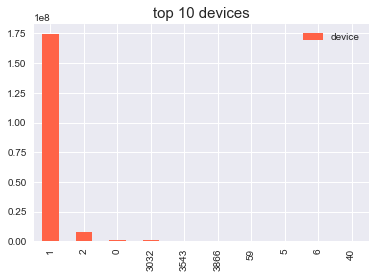

,device
1,174330052
2,8105054
0,1033413
3032,692891
3543,266596
3866,178274
59,24018
5,14379
6,12569
40,12351


In [98]:
plot_top(train, 'device', 'tomato', 'top 10 devices')

the plot shows top 10 devices with the most click numbers. The apps 1 have much more click numbers.

##### os

In [22]:
train['os'].nunique()

800

There are 800 unique values for os

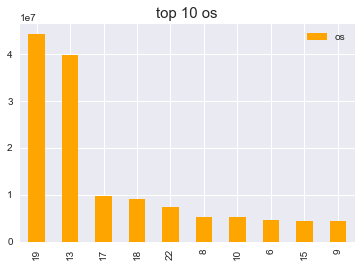

,os
19,44181914
13,39782808
17,9639776
18,8974159
22,7414405
8,5278317
10,5262422
6,4632561
15,4408470
9,4370878


In [100]:
plot_top(train, 'os', 'orange', 'top 10 os')

the plot shows top 10 os versions with the most click numbers. The os version 19 and 13 have much more click numbers.

##### channel

In [24]:
train['channel'].nunique()

202

There are 202 unique values for channels. 

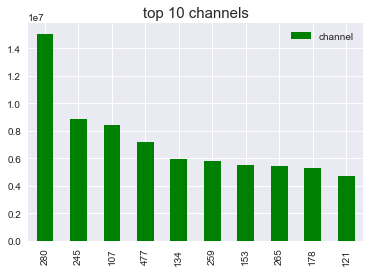

,channel
280,15065927
245,8873025
107,8457471
477,7188340
134,5924250
259,5787004
153,5537977
265,5446388
178,5271408
121,4692438


In [101]:
plot_top(train, 'channel', 'green', 'top 10 channels')

the plot shows top 10 channels with the most click numbers. The channel 280 has much more click numbers.

##### click time

In [5]:
def plot_click_time(col, title_name, xlabel_name):
    p1 = sns.countplot(col)
    plt.title(title_name, fontsize = 15)
    for p in p1.patches:
        height = p.get_height()
        p1.text(p.get_x() + p.get_width()/2,
            height + 50,
            '{:1.5f}'.format(height/len(col)),
            ha="center") 
    plt.xlabel(xlabel_name)
    plt.show()

In [6]:
def transform_date(df):
    df['day'] =  pd.DatetimeIndex(df['click_time']).day
    df['weekday'] = pd.DatetimeIndex(df['click_time']).weekday
    df['hour'] = pd.DatetimeIndex(df['click_time']).hour
    return df

In [26]:
train['click_time'].nunique()

259620

There are around 260 thousand unique values for click_time. 

In [27]:
train['click_time'].value_counts(normalize = True)

2017-11-07 14:00:11    8.123139e-06
2017-11-08 14:00:16    8.096098e-06
2017-11-07 05:00:18    8.079873e-06
2017-11-08 03:00:07    8.063649e-06
2017-11-07 11:00:21    7.971709e-06
2017-11-08 14:00:23    7.955484e-06
2017-11-09 12:00:11    7.955484e-06
2017-11-07 05:00:15    7.912219e-06
2017-11-07 09:00:10    7.841912e-06
2017-11-08 14:00:09    7.825687e-06
2017-11-08 14:00:18    7.771605e-06
2017-11-08 13:00:21    7.766197e-06
2017-11-07 14:00:12    7.766197e-06
2017-11-09 12:00:14    7.744564e-06
2017-11-08 14:00:10    7.733748e-06
2017-11-08 14:00:13    7.706706e-06
2017-11-08 15:00:19    7.695890e-06
2017-11-08 14:00:15    7.679665e-06
2017-11-08 09:00:12    7.674257e-06
2017-11-08 15:00:12    7.674257e-06
2017-11-09 11:00:19    7.674257e-06
2017-11-09 11:00:13    7.668849e-06
2017-11-09 13:00:17    7.663441e-06
2017-11-08 03:00:18    7.663441e-06
2017-11-07 05:00:16    7.647216e-06
2017-11-08 03:00:09    7.641808e-06
2017-11-08 03:00:17    7.636400e-06
2017-11-08 03:00:08    7.636

In [75]:
train['click_time'].max()

'2017-11-09 16:00:00'

In [76]:
train['click_time'].min()

'2017-11-06 14:32:21'

The start time for the training set was 2017-11-06 14pm and the end time was 2017-11-09 16pm. The training data covered four days information. 

In [7]:
train = transform_date(train)

In [6]:
# train['day'] =  pd.DatetimeIndex(train['click_time']).day

In [92]:
train['day'].value_counts(normalize = True)

8    0.340421
7    0.322510
9    0.286727
6    0.050343
Name: day, dtype: float64

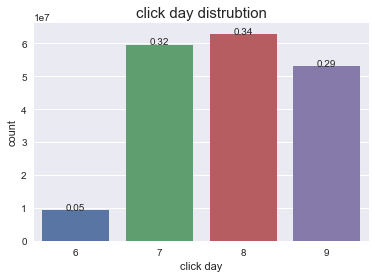

In [93]:
plot_click_time(train['day'], 'click day distrubtion', 'click day')

In [76]:
day6 = train[train.day == 6]
day6.click_time.min()

'2017-11-06 14:32:21'

In [77]:
day6.click_time.max()

'2017-11-06 23:59:59'

In [78]:
day7 = train[train.day ==7]
day7.click_time.min()

'2017-11-07 00:00:00'

In [79]:
day7.click_time.max()

'2017-11-07 23:59:59'

In [82]:
day8 = train[train.day ==8]
day8.click_time.min()

'2017-11-08 00:00:00'

In [83]:
day8.click_time.max()

'2017-11-08 23:59:59'

In [84]:
day9 = train[train.day ==9]
day9.click_time.min()

'2017-11-09 00:00:00'

In [85]:
day9.click_time.max()

'2017-11-09 16:00:00'

I extracted days for click time. The plot shows the distribution of click days. 6 percents clicks happened on 11-06 and around 30% clicks happend for each of the other three days. The reason is our data for 11-06 was from 14pm to 12am, only 10 hours. The data for 11-09 was from 0:00 am to 16pm. covering for 16 hours. The the click numbers for 11-09 was little fewer than 11-07 and 11-08.  

In [12]:
day_click = train[['day','is_attributed']].groupby(['day'], as_index=True).count()
day_click

,is_attributed
day,
6,9308568
7,59633310
8,62945075
9,53016937


In [29]:
weight = pd.DataFrame({'weight':[12, 24, 24, 16]})
weight.index = day_click.index
average_hour_click = pd.DataFrame(day_click.values / weight.values)
average_hour_click.index = weight.index
average_hour_click.columns = ['average click number']
average_hour_click

,average click number
day,
6,775714
7,2484721
8,2622711
9,3313558


According the average hourly click numbers, 11-06 has the lowest average hourly click numbers and 11-09 has the highest, around 3 times higher than 11-06. The reason might be data for 11-06 were for the afternoon and evening, when had lower click numbers while the data for 11-09 were for the morning, when tended to have more clicks. 

In [94]:
train['weekday'].unique()

array([0, 1, 2, 3])

I also extracted weekday for the click date. These four days were from Monday to Thursday. 

In [95]:
train['hour'].value_counts(normalize = True)

4     0.060698
0     0.056334
13    0.055755
14    0.055606
5     0.054403
10    0.053985
11    0.053611
12    0.053267
2     0.052732
3     0.052695
6     0.051226
1     0.051144
7     0.050110
15    0.049900
9     0.048760
8     0.046414
16    0.038282
23    0.038182
17    0.021167
22    0.019776
18    0.012217
21    0.008539
19    0.008347
20    0.006849
Name: hour, dtype: float64

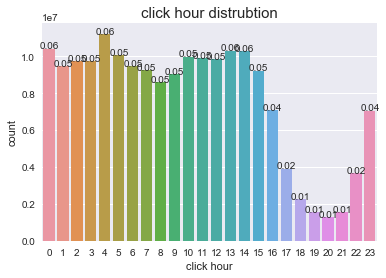

In [12]:
plot_click_time(train['hour'], 'click hour distrubtion', 'click hour')

I also extracted the click hours. This is the distribution of click hours. We could see number of clicks during 17pm to 22pm were much fewer than other times. 

In [ ]:
train['click_time'] =  pd.to_datetime(train['click_time'])

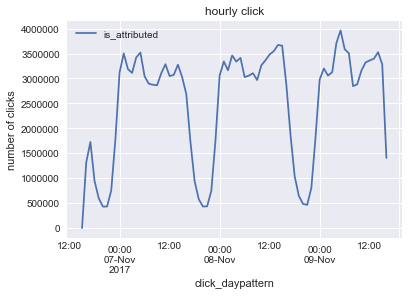

In [16]:
train['click_daypattern']=train['click_time'].dt.round('H')  

#check for hourly patterns
train[['click_daypattern','is_attributed']].groupby(['click_daypattern'], as_index=True).count().plot()
plt.title('hourly click');
plt.ylabel('number of clicks');

The plot shows the distribution of the number of clicks over four days. We could see it has periordic pattern. The number of clicks is much fewer during the night. Also the plot shows the number of clicks in 2017-11-06 was much fewer than the other three days, which are consistent with the results above.   

In [51]:
temp = train[['hour','is_attributed']].groupby(['hour']).mean()
temp

,is_attributed
hour,
0,0.002083
1,0.002945
2,0.003016
3,0.002962
4,0.002605
5,0.002637
6,0.002719
7,0.002769
8,0.002950


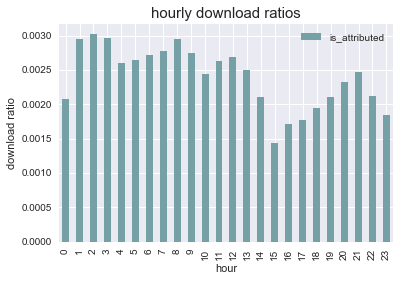

In [81]:
p1 = train[['hour','is_attributed']].groupby(['hour']).mean().plot(kind='bar', color='#75a1a6')
plt.title('hourly download ratios', fontsize = 15)
plt.ylabel('download ratio')

This is the plot for hourly download ratios. From the plot we could see the conversion rates from 15pm to 17pm and rom 22pm to 0am were lower than other times.

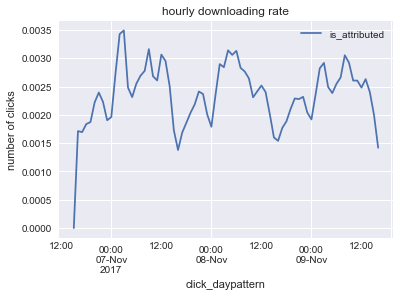

In [20]:
train[['click_daypattern', 'is_attributed']].groupby(['click_daypattern']).mean().plot()
plt.title('hourly downloading rate')
plt.ylabel('number of clicks')

This is the download ratios for four days. We could see periodic pattern: the conversion rate arrived at the minimum at the afternoon. 

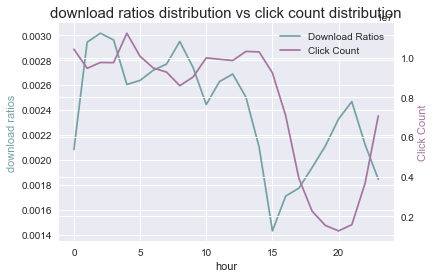

In [59]:
group = train.groupby('hour',as_index = False)['is_attributed'].mean()
x = group['hour']
ymean = group['is_attributed']
group = train.groupby('hour' , as_index = False)['is_attributed'].count()
ycount = group['is_attributed']

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("hour")
host.set_ylabel("download ratios")
par1.set_ylabel("Click Count")

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
color1 = '#75a1a6'
color2 = '#a675a1'

p1, = host.plot(x, ymean, color=color1,label="Download Ratios")
p2, = par1.plot(x, ycount, color=color2, label="Click Count")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.title('download ratios distribution vs click count distribution', fontsize = 15)
plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

The plot shows two distributions: the purple one is click number distribution and the green one is download ratios distribution. X-axis is hours. We can see these two distributions are different. The number of clicks in 15pm is very high, however the conversion rate(download app ratio) is very low. The number of clicks at 8pm is the fewest, but the conversion rate is not very low. 

In [58]:
#sns.barplot('hour', 'is_attributed', data=train)
#plt.title('HOURLY CONVERSION RATIO');
#plt.ylabel('Converted Ratio');


In [8]:
test = transform_date(test)

In [35]:
print 'the testing data collected information from ' + str(test['click_time'].min()) + ' to ' + str(test['click_time'].max())

the testing data collected information from 2017-11-10 04:00:00 to 2017-11-10 15:00:00


so we only predict for one day data from 4am to 15pm.  

In [36]:
# date in training data
# * the start date was 2017-11-06 14:32 in the training data and the end date was 2017-11-09 16:00. The data collected four days information from Monday to Thursday. 
# * clicks happened at the same frequency from 11-07 to 11-09 and click happend fewer than the other three days.
# * clicks happened less frequently from 17pm to 22pm. 

# date in testing data
# * the start time was 2017-11-10 15:00 and the end time was 04:00. So we only need to predict for one day. 

##### is_attributed

This is the variable that we need to predict in the testing data. It has binary values. 

In [33]:
train['is_attributed'].value_counts(normalize = True)

0    0.997529
1    0.002471
Name: is_attributed, dtype: float64

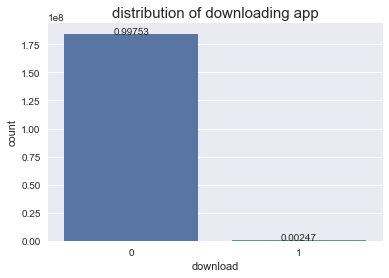

In [104]:
plot_click_time(train['is_attributed'], 'distribution of downloading app', 'download')

Only 0.247% of data downloaded the app while 99.753% didn't. So the data was very imbalanced. 

##### attributed_time

In [64]:
train[train['attributed_time'].isnull()]['is_attributed'].unique()

array([0])

In [65]:
train[~train['attributed_time'].isnull()]['is_attributed'].unique()

array([1])

the variable 'attributed_time' is 100% correlated with the response variable 'is_attributed'. Also in the testing data, we don't have this varaible. So I will remove this variable in the model.

In [66]:
train.drop(columns = 'attributed_time', inplace = True)

### Multivariate analysis

In [10]:
download = train[train.is_attributed == 1]
not_download = train[train.is_attributed == 0]

In [62]:
download.shape

(456846, 12)

In [63]:
print 'there are ' + str(download.shape[0]) + ' people in the training data who downloaded the app'

there are 456846 people in the training data who downloaded the app


In [64]:
not_download.shape

(184447044, 12)

In [65]:
print 'there are ' + str(not_download.shape[0]) + ' people in the training data who did not download the app'

there are 184447044 people in the training data who did not download the app


In [81]:
def plot_top(df, col, color, title, num):
    top_ip_download = pd.DataFrame(df[col].value_counts()).head(10)
    top_ip_download.plot(kind = 'bar', color = color)
    plt.title(title, fontsize = 15)
    plt.show()
    return top_ip_download

##### download 

In [70]:
# ip_click_download = pd.concat([top_ip_click, top_ip_download], axis = 1)
# ip_click_download

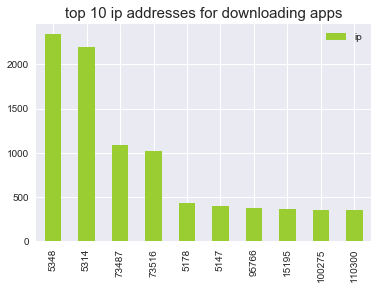

,ip
5348,2340
5314,2200
73487,1091
73516,1025
5178,436
5147,399
95766,379
15195,367
100275,357
110300,350


In [84]:
plot_top(download, 'ip', 'yellowgreen', 'top 10 ip addresses for downloading apps')

The top 3 ip addresses which download apps the most are 5348, 5314 and 73487. These three ip addresses also have very high click numbers. 

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


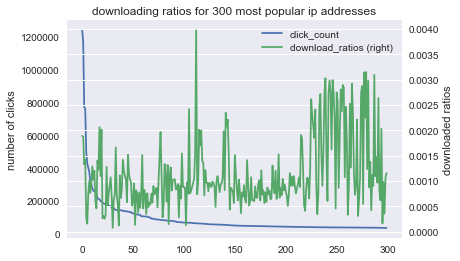

In [101]:
top_ip_download = train[['ip', 'is_attributed']].groupby('ip', as_index=False).mean().sort_values('is_attributed', ascending=False)
top_ip_click = train[['ip', 'is_attributed']].groupby('ip', as_index=False).count().sort_values('is_attributed', ascending=False)
ip_click_download = top_ip_click.merge(top_ip_download, on='ip', how='left')
ip_click_download.columns = ['ip', 'click_count', 'download_ratios']

ax = ip_click_download[:300].plot(secondary_y='download_ratios')
plt.title('downloading ratios for 300 most popular ip addresses')
ax.set(ylabel='number of clicks')
plt.ylabel('downloaded ratios')
plt.show()

The plot shows downloading ratios for 300 most popular ip addresses and thier click numbers. The plot shows there are no obvious relationship between the click number and the conversion rate. 

In [99]:
top_ip_download[top_ip_download.ip == 5348]

,ip,is_attributed
1654,5348,0.001889


In [100]:
top_ip_download[top_ip_download.ip == 5314]

,ip,is_attributed
1642,5314,0.001878


In [105]:
top_ip_download['rank'] = range(top_ip_download.shape[0])

In [109]:
top_ip_download.shape[0]

277396

In [107]:
top_ip_download[top_ip_download.ip == 5348]

,ip,is_attributed,rank
1654,5348,0.001889,212731


In [108]:
top_ip_download[top_ip_download.ip == 5314]

,ip,is_attributed,rank
1642,5314,0.001878,212932


There are 277,396 ip addresses, and the conversion rate ranking for these two ip addresses are a liitle bit low. As these two ip addresses have large number of clicks, so we may doubt whether they are fraudulent. 

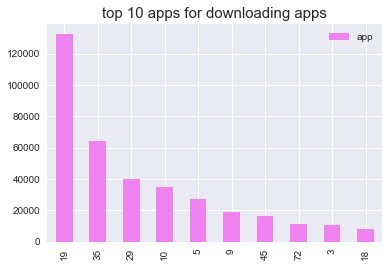

,app
19,132390
35,64279
29,39957
10,34578
5,27263
9,18823
45,16307
72,11443
3,10261
18,7919


In [86]:
plot_top(download, 'app', 'violet', 'top 10 apps for downloading apps')

The top 3 app that download apps the most are 19, 35 and 29.

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


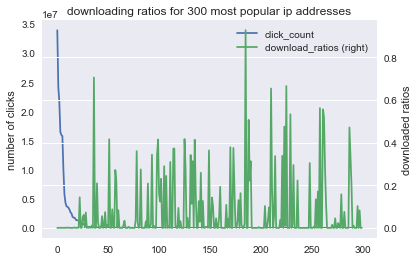

In [112]:
top_app_download = train[['app', 'is_attributed']].groupby('app', as_index=False).mean().sort_values('is_attributed', ascending=False)
top_app_click = train[['app', 'is_attributed']].groupby('app', as_index=False).count().sort_values('is_attributed', ascending=False)
app_click_download = top_app_click.merge(top_app_download, on='app', how='left')
app_click_download.columns = ['app', 'click_count', 'download_ratios']

ax = app_click_download[:300].plot(secondary_y='download_ratios')
plt.title('downloading ratios for 300 most popular app addresses')
ax.set(ylabel='number of clicks')
plt.ylabel('downloaded ratios')
plt.show()

The plot shows downloading ratios for 300 most popular apps and thier click numbers. Still the plot shows there are no obvious relationship between the click number and the conversion rate. From the plot, we can see here is an app has very large number of clicks but around 0 conversion rate. We want to find out it since it has the high probability of fraudulent.  

In [118]:
top_app_click.iloc[0]

app                     3
is_attributed    33911780
Name: 3, dtype: object

In [119]:
app_click_download[app_click_download.app == 3]

,app,click_count,download_ratios
0,3,33911780,0.000303


then we will check other two apps with the highest click numbers app12 and app2. 

In [128]:
# top_app_download['rank'] = range(top_app_download.shape[0])

In [129]:
# top_app_download[top_app_download.app == 12]

In [127]:
# top_app_download[top_app_download.app == 2]

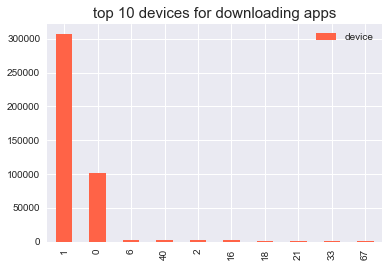

,device
1,306495
0,101817
6,2937
40,2605
2,2223
16,2202
18,1473
21,1150
33,1100
67,809


In [87]:
plot_top(download, 'device', 'tomato', 'top 10 devices for downloading apps')

The top 3 devices which download apps the most are 1, 0 and 6. device 1 has the highest click numbers during all types of devices. 

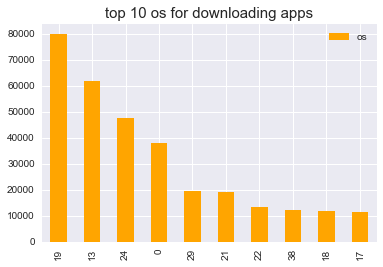

,os
19,79669
13,61622
24,47461
0,38039
29,19534
21,19181
22,13115
38,11976
18,11682
17,11371


In [88]:
plot_top(download, 'os', 'orange', 'top 10 os for downloading apps')

The top 3 os which download apps the most are 19, 13 and 24. os version 19 and 13 has the highest click numbers during all os versions. 

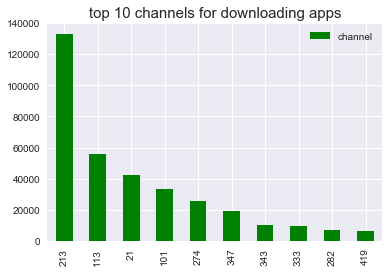

,channel
213,133070
113,55866
21,42469
101,33176
274,25888
347,19113
343,10272
333,9477
282,6699
419,6675


In [90]:
plot_top(download, 'channel', 'green', 'top 10 channels for downloading apps')

The top 3 channels which download apps the most are 213, 113 and 21. 

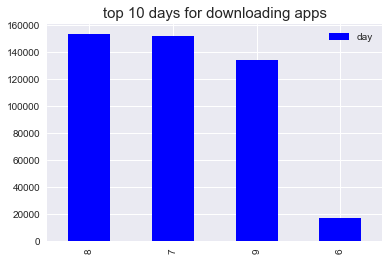

,day
8,153321
7,152164
9,133967
6,17394


In [91]:
plot_top(download, 'day', 'blue', 'top 10 days for downloading apps')

##### not download

In [39]:
def never_download(df, col, color, title):
    never_download = df[[col, 'is_attributed']].groupby(col, as_index = False)['is_attributed'].sum()
    never = never_download[never_download.is_attributed == 0][col]
    never_df = df[df[col].isin(never)]
    plot_top(never_df, col, color, title)
    plt.show()
    return never_df

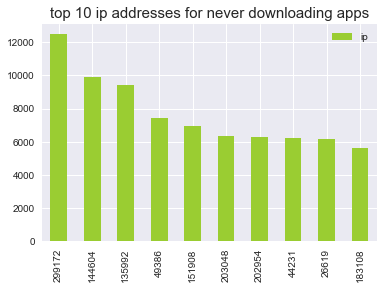

In [31]:
never_id_df = never_download(train, 'ip', 'yellowgreen', 'top 10 ip addresses for never downloading apps')

In [33]:
never_download = train[['app', 'is_attributed']].groupby('app', as_index = False)['is_attributed'].sum()

In [34]:
never_download[n]

,app,is_attributed
0,0,1005
1,1,1230
2,2,5661
3,3,10261
4,4,5
5,5,27263
6,6,205
7,7,1182
8,8,6875
9,9,18823


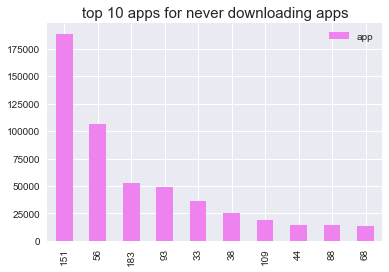

In [37]:
never_apps_df = never_download(train, 'app', 'violet', 'top 10 apps for never downloading apps')

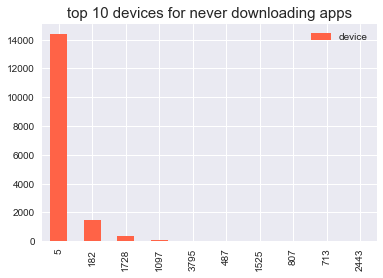

In [41]:
never_device_df = never_download(train, 'device', 'tomato', 'top 10 devices for never downloading apps')

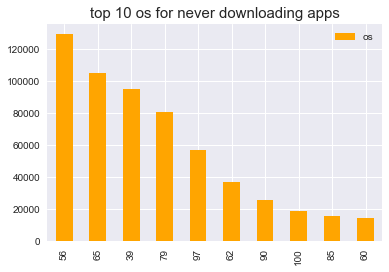

In [43]:
never_os_df = never_download(train, 'os', 'orange', 'top 10 os for never downloading apps')

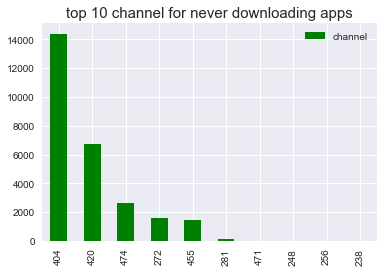

In [44]:
never_channel_df = never_download(train, 'channel', 'green', 'top 10 channel for never downloading apps')

In [ ]:
plot_top(never_ip_df, 'device', 'yellowgreen', 'top 10 ip addresses for never downloading apps')

timeline:
* more EDAs: half of a day
* creating features: one and a half days to two days
* feature selection: one and a half days (may slow due to large size of data) 
* built logistic regression model, xgboost and gbm to compare results. (imbalanced data: logistic regression could assign weights for classes, but xgboost and gbm only assign weights for data point. May not deal with imbalanced data very well? oversampling or undersampling?):
each model 2 or 3 days  
* report: one day

large size?

In [132]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,weekday,hour
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,6,0,14
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,6,0,14
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,6,0,14
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,6,0,14
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,6,0,14


In [9]:
user = train.sort_values(['ip', 'device', 'os', 'click_time'])

In [9]:
user_byapp = train.sort_values(['ip', 'device', 'os', 'app', 'click_time'])

In [12]:
user = user[['ip', 'device', 'os', 'app', 'channel', 'click_time', 'day','weekday', 'hour', 'is_attributed']]

In [15]:
user

,ip,device,os,app,channel,click_time,day,weekday,hour,is_attributed
125691702,1,1,2,2,477,2017-11-08 17:47:39,8,2,17,0
127330043,1,1,2,2,477,2017-11-08 20:08:39,8,2,20,0
127343825,1,1,2,2,477,2017-11-08 20:10:32,8,2,20,0
128312967,1,1,2,2,477,2017-11-08 22:03:35,8,2,22,0
141467628,1,1,2,2,477,2017-11-09 03:01:59,9,3,3,0
180451292,1,1,2,14,449,2017-11-09 14:34:09,9,3,14,0
180452058,1,1,2,1,125,2017-11-09 14:34:10,9,3,14,0
180453155,1,1,2,18,449,2017-11-09 14:34:11,9,3,14,0
180453618,1,1,2,18,449,2017-11-09 14:34:12,9,3,14,0
128588870,1,1,3,13,469,2017-11-08 22:20:54,8,2,22,0


In [10]:
user_byapp = user_byapp[['ip', 'device', 'os', 'app', 'channel', 'click_time', 'day','weekday', 'hour', 'is_attributed']]

In [19]:
user_byapp

,ip,device,os,app,channel,click_time,day,weekday,hour,is_attributed
180452058,1,1,2,1,125,2017-11-09 14:34:10,9,3,14,0
125691702,1,1,2,2,477,2017-11-08 17:47:39,8,2,17,0
127330043,1,1,2,2,477,2017-11-08 20:08:39,8,2,20,0
127343825,1,1,2,2,477,2017-11-08 20:10:32,8,2,20,0
128312967,1,1,2,2,477,2017-11-08 22:03:35,8,2,22,0
141467628,1,1,2,2,477,2017-11-09 03:01:59,9,3,3,0
180451292,1,1,2,14,449,2017-11-09 14:34:09,9,3,14,0
180453155,1,1,2,18,449,2017-11-09 14:34:11,9,3,14,0
180453618,1,1,2,18,449,2017-11-09 14:34:12,9,3,14,0
128603858,1,1,3,9,134,2017-11-08 22:21:43,8,2,22,0


In [27]:
download = user_byapp[user_byapp.is_attributed == 1]

In [30]:
user_byapp[user_byapp.app == 19]

,ip,device,os,app,channel,click_time,day,weekday,hour,is_attributed
45976634,5,50,0,19,101,2017-11-07 11:31:12,7,1,11,0
159050188,6,0,0,19,347,2017-11-09 07:57:33,9,3,7,0
71831412,6,0,21,19,213,2017-11-08 00:49:21,8,2,0,0
107616080,6,0,50,19,347,2017-11-08 11:54:04,8,2,11,0
74841264,6,14,24,19,213,2017-11-08 01:46:23,8,2,1,0
74857230,6,14,24,19,213,2017-11-08 01:46:43,8,2,1,0
75117288,6,14,24,19,213,2017-11-08 01:52:05,8,2,1,0
75128993,6,14,24,19,213,2017-11-08 01:52:21,8,2,1,1
83148368,6,16,0,19,213,2017-11-08 04:15:27,8,2,4,0
124439688,6,61,21,19,213,2017-11-08 16:57:21,8,2,16,0


In [25]:
download['app'].value_counts()

19     132390
35      64279
29      39957
10      34578
5       27263
9       18823
45      16307
72      11443
3       10261
18       7919
8        6875
2        5661
11       5391
39       5203
66       4159
20       3828
15       3418
84       2779
12       2640
14       2505
83       2350
27       2229
107      2101
62       2048
37       1879
50       1781
96       1725
108      1613
26       1461
79       1427
43       1326
1        1230
7        1182
34       1149
115      1130
32       1128
55       1110
145      1039
48       1029
0        1005
16        903
190       875
121       858
13        721
51        704
36        689
148       646
150       631
155       628
24        618
116       601
70        579
120       541
17        510
64        504
78        491
167       490
21        482
60        412
125       399
105       395
82        357
98        329
71        300
175       300
52        285
128       273
214       257
481       229
112       226
246       207
6     

In [32]:
download[download.app == 19]['channel'].value_counts()

213    94007
347    18334
333     8218
282     4540
343     2627
210     1780
101     1733
268     1149
451        2
222        0
221        0
219        0
217        0
216        0
215        0
212        0
224        0
211        0
208        0
205        0
203        0
182        0
181        0
178        0
174        0
173        0
172        0
223        0
232        0
225        0
248        0
266        0
265        0
262        0
261        0
259        0
258        0
256        0
253        0
251        0
245        0
227        0
244        0
243        0
242        0
238        0
237        0
236        0
234        0
233        0
169        0
171        0
500        0
165        0
24         0
115        0
114        0
113        0
111        0
110        0
108        0
107        0
105        0
30         0
29         0
22         0
272        0
21         0
19         0
18         0
17         0
15         0
14         0
13         0
5          0
4          0
3          0

In [ ]:
user_byapp[user_byapp == 19]['channel'].value_counts()